In [1]:
from astropy import units as u
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import astropy.coordinates as coord
import pandas as pd
import numpy as np
import lightkurve as lk

/home/polina/miniforge3/envs/ciao-4.17/lib/python3.11/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## Vizier

In [4]:
#очисттить кэш
Vizier.clear_cache()

vizier = Vizier(columns=['**'])
catalog_list = vizier.query_region(coord.SkyCoord(ra="91.88254348", dec="22.35759401528", unit=(u.deg, u.deg), 
                                            frame='icrs'), radius = Angle(0.001, 'deg'))
catalog_list[50]

_r,TIC,RAJ2000,DEJ2000,HIP,TYC,UCAC4,2MASS,objID,WISEA,GAIA,APASS,KIC,S/G,Ref,r_Pos,pmRA,e_pmRA,pmDE,e_pmDE,r_pm,Plx,e_Plx,r_Plx,GLON,GLAT,ELON,ELAT,Bmag,e_Bmag,u_e_Bmag,Vmag,e_Vmag,u_e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,q_2MASS,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,Gmag,e_Gmag,Tmag,e_Tmag,f_Tmag,Flag,Teff,s_Teff,logg,s_logg,[M/H],e_[M/H],Rad,s_Rad,Mass,s_Mass,rho,s_rho,LClass,Lum,s_Lum,Dist,s_Dist,E(B-V),s_E(B-V),Ncont,Rcont,Disp,m_TIC,Prior,e_E(B-V),E_E(B-V),f_E(B-V),e_Mass,E_Mass,e_Rad,E_Rad,e_rho,E_rho,e_logg,E_logg,e_Lum,E_Lum,e_Dist,E_Dist,r_Dist,e_Teff,E_Teff,r_Teff,BPmag,e_BPmag,RPmag,e_RPmag,q_Gaia,r_Vmag,r_Bmag,Clist,e_RAJ2000,e_DEJ2000,RAOdeg,DEOdeg,e_RAOdeg,e_DEOdeg,RadFl,WDFl,ID,Sloan
,,deg,deg,,,,,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,,mas,mas,,deg,deg,deg,deg,mag,mag,,mag,mag,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,K,K,log(cm.s**-2),log(cm.s**-2),log(Sun),log(Sun),solRad,solRad,solMass,solMass,Sun,Sun,,solLum,solLum,pc,pc,mag,mag,,,,,,mag,mag,,solMass,solMass,solRad,solRad,Sun,Sun,log(cm.s**-2),log(cm.s**-2),solLum,solLum,pc,pc,,K,K,,mag,mag,mag,mag,,,,,mas,mas,deg,deg,mas,mas,,,,
float64,int64,float64,float64,int32,str12,str10,str17,int64,str19,int64,int32,int32,str8,str11,str11,float64,float64,float64,float32,str6,float64,float64,str5,float64,float64,float64,float64,float32,float32,uint8,float32,float32,uint8,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,str19,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,str5,str5,float64,float64,float32,float32,float64,float32,float64,float32,float32,float32,float64,float64,str5,float64,float64,float64,float64,float64,float64,int16,float64,str9,int32,float64,float64,float64,str9,float32,float32,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,str6,float32,float32,str6,float64,float64,float64,float64,int16,str11,str8,str15,float64,float64,float64,float64,float64,float64,int16,int16,int32,str5
0.000010,45115503,91.88254302072,22.35759477570,--,,562-024737,06073181+2221273,1237673738317660833,J060731.79+222127.2,3423567909665946240,46188797,--,STAR,tmgaia2,tmgaia2,-16.024,0.116,-14.659,0.097,gaia2,3.4946,0.1102,gaia2,188.16699748715,0.95820029300,91.74128873011,-1.07030814052,13.976,0.048,0,13.027,0.114,0,15.615,0.005,14.266,0.005,12.926,0.002,12.631,0.002,12.931,0.005,11.320,0.021,10.840,0.023,10.694,0.022,AAA-222-111-000-0-0,10.648,0.023,10.672,0.021,10.552,0.101,8.885,--,12.791000,0.002767,12.183,0.008,rered,gaia2,4897.0,128.5,4.3084,0.0946,--,--,1.039,0.076,0.801,0.102,0.7141,0.1947,DWARF,0.55934,0.04301,284.2850,8.9860,0.0288,0.0128,435,0.2440,,--,--,0.0098,0.0159,panstarrs,0.068,0.136,0.069,0.083,0.1723,0.2170,0.1207,0.0686,0.04510,0.04092,8.7070,9.2650,bj2018,147.8,109.2,dered,13.314100,0.008859,12.121700,0.005428,1,ucac4,apassdr9,,1.83981919620,1.50326398062,91.88246842251,22.35753166187,0.05703261378,0.08159532661,1,0,98796834,Sloan


## TESS lightkurve

In [2]:
search_result= lk.search_lightcurve ('TIC 45115503') #('91.882543 +22.35759')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,QLP,600,45115503,0.0
1,TESS Sector 44,2021,QLP,600,45115503,0.0
2,TESS Sector 71,2023,QLP,200,45115503,0.0
3,TESS Sector 72,2023,QLP,200,45115503,0.0


In [3]:
lc = search_result[1].download() #0- много выбросов, 2 и 3 не очень
lc

time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
,,,,,,,,,pix,pix,,,,
Time,float32,float32,int32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32
2500.1928274643287,1.0182898044586182,0.0029075685888528824,183273,1.0182898,1.0009542,0.0029075686,4096,95,292.43328857421875,381.08575439453125,47340.61,1154.77,1.0010359,1.0019635
2500.199772587194,1.0231380462646484,0.0029075685888528824,183274,1.023138,1.0062224,0.0029075686,4096,96,292.43206787109375,381.08807373046875,44794.83,1272.79,1.0030907,1.0060965
2500.206717710059,1.0138696432113647,0.0029075685888528824,183275,1.0138696,0.99758554,0.0029075686,4096,0,292.4325256347656,381.09136962890625,42533.36,892.68,0.9992347,0.9954026
2500.2136628334633,1.0226938724517822,0.0029075685888528824,183276,1.0226939,1.0067309,0.0029075686,4096,0,292.4298400878906,381.0934753417969,40383.52,1062.71,1.0040394,1.0092868
2500.220607957376,1.017759919166565,0.0029075685888528824,183277,1.0177599,1.0023155,0.0029075686,4096,0,292.43170166015625,381.0965881347656,38024.48,1000.32,1.0013343,1.0030369
2500.22755308129,1.0173259973526,0.0029075685888528824,183278,1.017326,1.0023105,0.0029075686,4096,0,292.4342346191406,381.09307861328125,36333.41,1176.46,1.0015595,1.0023805
2500.234498205202,1.0126467943191528,0.0029075685888528824,183279,1.0126468,0.9981025,0.0029075686,4096,0,292.4325256347656,381.0980224609375,34305.76,1326.77,0.99754024,1.0006846
2500.2414433291156,1.0212348699569702,0.0029075685888528824,183280,1.0212349,1.0069543,0.0029075686,4096,0,292.43212890625,381.09326171875,32699.02,1331.56,1.005803,1.007688


In [4]:
lc.hdu[1].header


/tmp/ipykernel_5352/63528604.py:1: LightkurveDeprecationWarning: The hdu function is deprecated and may be removed in a future version.
        Use fits.open(lc.filename) instead.
  lc.hdu[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                 3278 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'BJD-2457000, days'                                                   
TTYPE2  = 'CADENCENO'                                                           
TFORM2  = 'J       '        

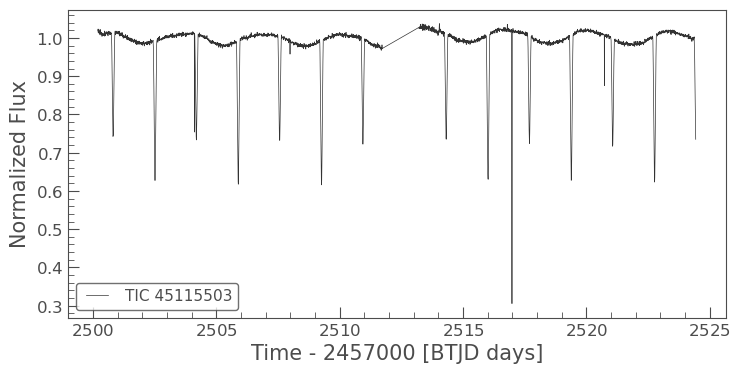

In [5]:
lc.plot()
plt.show()

In [9]:
lc3 = search_result[0].download() #0- много выбросов, 2 и 3 не очень
lc3

time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
,,,,,,,,,pix,pix,,,,
Time,float32,float32,int32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32
2474.1694652140877,1.012969970703125,0.0030820430256426334,179526,1.01297,0.997904,0.003082043,4096,93,1874.70703125,1494.5531005859375,3588.3,673.92,0.99928796,0.99755675
2474.1764103562264,1.0131694078445435,0.0030820430256426334,179527,1.0131694,0.9981302,0.003082043,4096,94,1874.7049560546875,1494.5438232421875,3415.06,474.66,0.9987281,0.99834555
2474.1833554983673,1.0097845792770386,0.0030820430256426334,179528,1.0097846,0.99483323,0.003082043,4096,0,1874.7093505859375,1494.5528564453125,2836.78,522.43,0.99843675,0.9920527
2474.1903006405037,1.019210696220398,0.0030820430256426334,179529,1.0192107,1.0041659,0.003082043,4096,0,1874.7100830078125,1494.551513671875,1943.3,330.27,1.0011827,1.0058945
2474.197245782643,1.0144827365875244,0.0030820430256426334,179530,1.0144827,0.99956167,0.003082043,4096,0,1874.7073974609375,1494.546142578125,1772.51,332.53,1.0003197,0.9968849
2474.204190924782,1.021811604499817,0.0030820430256426334,179531,1.0218116,1.0068448,0.003082043,4096,0,1874.7076416015625,1494.550048828125,1379.15,368.1,1.0031996,1.0091964
2474.211136067959,1.015131950378418,0.0030820430256426334,179532,1.015132,1.0003325,0.003082043,4096,0,1874.705322265625,1494.549560546875,1406.94,399.16,1.0003256,0.99945015
2474.218081212112,1.0156186819076538,0.0030820430256426334,179533,1.0156187,1.000889,0.003082043,4096,0,1874.7064208984375,1494.54833984375,1394.17,351.41,0.99919283,1.0021099


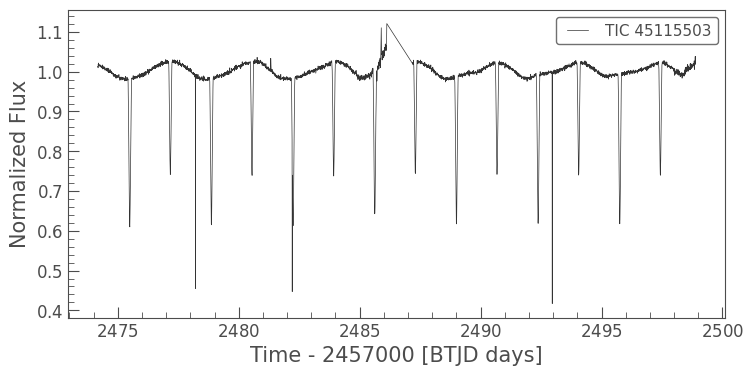

In [10]:
lc3.plot()
plt.show()

## TPF, FFI

In [4]:
search_result=lk.search_tesscut('TIC 45115503')
search_result
#tpf = search_result[0].download()
#tpf.plot()

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,TESScut,475,TIC 45115503,0.0
1,TESS Sector 44,2021,TESScut,475,TIC 45115503,0.0
2,TESS Sector 72,2023,TESScut,158,TIC 45115503,0.0
3,TESS Sector 71,2023,TESScut,158,TIC 45115503,0.0


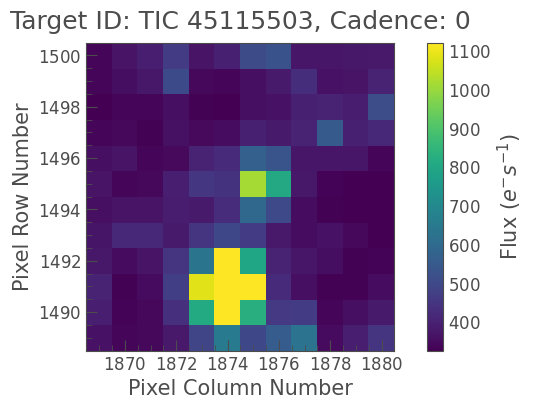

In [15]:
tpf_s43 = lk.search_tesscut('TIC 45115503', sector=43).download(cutout_size=12)
tpf_s43.plot()
plt.show()


In [7]:
from lightkurve.correctors import PLDCorrector


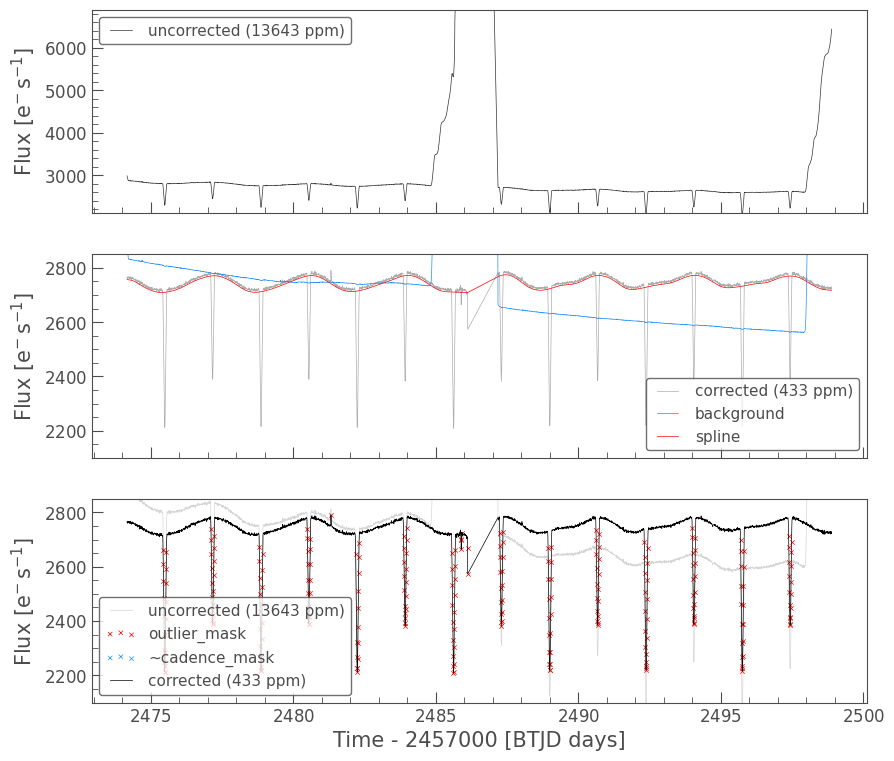

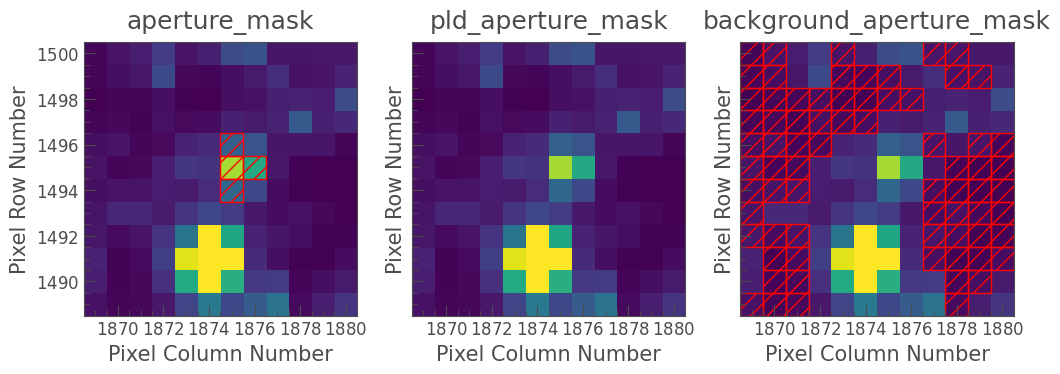

In [18]:
pld = PLDCorrector(tpf_s43)
corrected_lc = pld.correct()
pltAxis = pld.diagnose()
pltAxis[0].set_ylim(ymin = 2100, ymax = 6900)
pltAxis[1].set_ylim(ymin = 2100, ymax = 2850)
pltAxis[2].set_ylim(ymin = 2100, ymax = 2850)
pld.diagnose_masks()
plt.show()

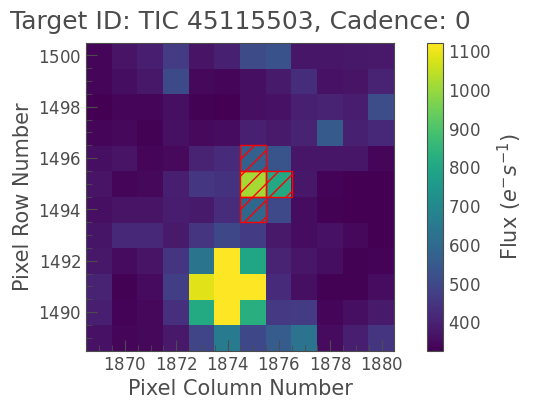

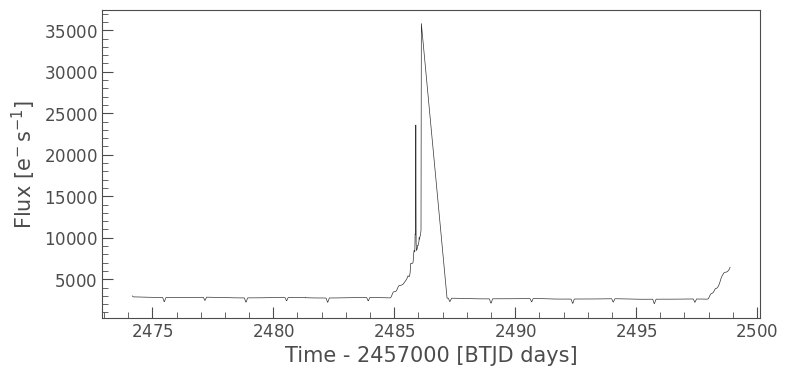

In [20]:
cut_mask = np.zeros(tpf_s43[0].shape[1:], dtype='bool')

cut_mask[7,6] = True
cut_mask[6,6] = True
cut_mask[6,7] = True
cut_mask[5,6] = True


lc_3_tpf = tpf_s43.to_lightcurve(aperture_mask = cut_mask)
tpf_s43.plot(aperture_mask = cut_mask)
lc_3_tpf.plot()
#plt.ylim(ymin = 12600, ymax = 13500)
plt.show()

In [9]:
pld.diagnose_masks()

array([<Axes: title={'center': 'aperture_mask'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>,
       <Axes: title={'center': 'pld_aperture_mask'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>,
       <Axes: title={'center': 'background_aperture_mask'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>],
      dtype=object)

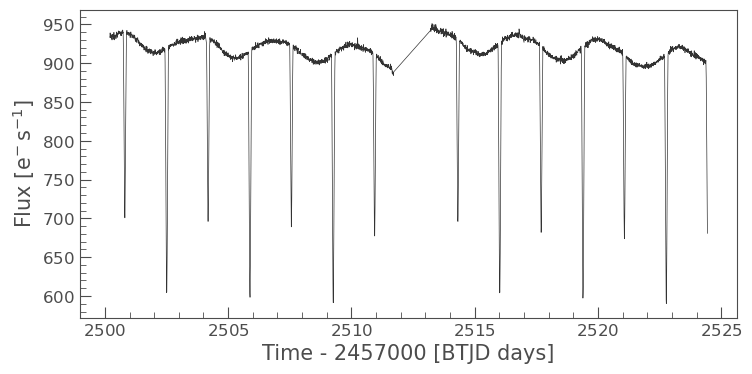

In [14]:
n_target_pixels = cut_mask.sum() # количество пикселей в выбранной апертуре
n_background_pixels = background_mask.sum() # количество пикселей в маске фона
background_lc_per_pixel = tpf_s44.to_lightcurve(aperture_mask=background_mask) /n_background_pixels # кривая блеска фона в расчете на 1 пиксель
background_lc = background_lc_per_pixel * n_target_pixels # фон, который необходимо вычесть из кривой блеска объекта
corrected_lc=lc_target - background_lc.flux # кривая блеска объекта после учетафона
corrected_lc.plot()
plt.show()



In [15]:
tpf_s44.interact()

In [16]:
b_mask = np.zeros(tpf_s44[0].shape[1:], dtype='bool')

b_mask[10,0] = True
b_mask[9,0] = True
b_mask[8,0] = True
b_mask[7,0] = True
b_mask[6,0] = True
b_mask[5,0] = True

b_mask[10,1] = True
b_mask[9,1] = True
b_mask[8,1] = True
b_mask[7,1] = True
b_mask[6,1] = True
b_mask[5,1] = True

b_mask[10,2] = True
b_mask[9,2] = True
b_mask[8,2] = True

b_mask[10,3] = True
b_mask[9,3] = True






b_mask[6,3] = True

In [17]:
pld = PLDCorrector(lc_tpf)
corrected_lc = pld.correct()
pltAxis = pld.diagnose()
pltAxis[0].set_ylim(ymin = 900, ymax = 1500)
pltAxis[1].set_ylim(ymin = 900, ymax = 1500)
pltAxis[2].set_ylim(ymin = 900, ymax = 1500)
pld.diagnose_masks()
plt.show()

NameError: name 'lc_tpf' is not defined

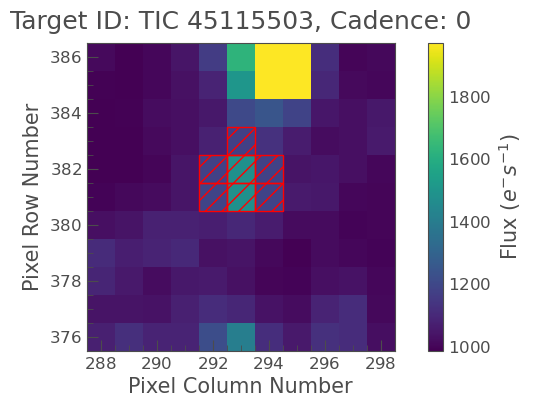

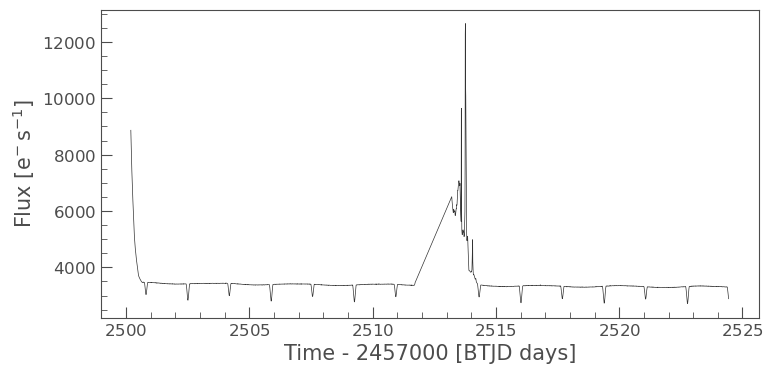

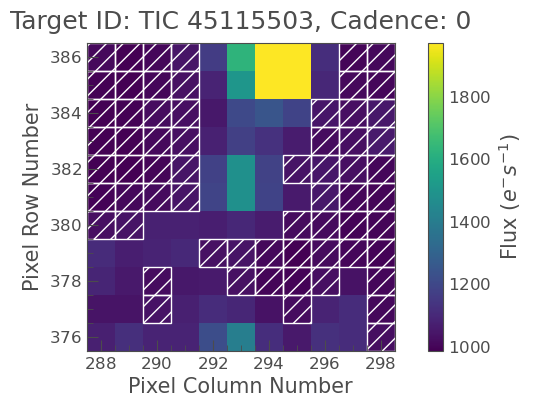

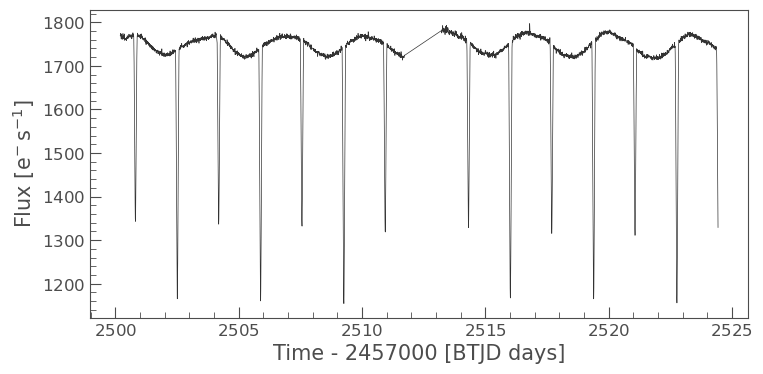

In [18]:
c_mask = np.zeros(tpf_s44[0].shape[1:], dtype='bool')

c_mask[5,5] = True
c_mask[6,5] = True

c_mask[7,5] = True
c_mask[5,4] = True
c_mask[6,4] = True
c_mask[5,6] = True
c_mask[6,6] = True

lc_tpf = tpf_s44.to_lightcurve(aperture_mask = c_mask)
tpf_s44.plot(aperture_mask = c_mask)
lc_tpf.plot()
#plt.ylim(ymin = 12600, ymax = 13500)

background_mask = ~tpf_s44.create_threshold_mask(threshold=0.001)
tpf_s44.plot(aperture_mask=background_mask, mask_color='w')

n_target_pixels = c_mask.sum() # количество пикселей в выбранной апертуре
n_background_pixels = background_mask.sum() # количество пикселей в маске фона
background_lc_per_pixel = tpf_s44.to_lightcurve(aperture_mask=background_mask) /n_background_pixels # кривая блеска фона в расчете на 1 пиксель
background_lc = background_lc_per_pixel * n_target_pixels # фон, который необходимо вычесть из кривой блеска объекта
corrected_lc=lc_tpf - background_lc.flux # кривая блеска объекта после учетафона
corrected_lc.plot()


plt.show()

In [19]:
a = corrected_lc.time.value
a

array([2500.19244562, 2500.19939075, 2500.20633588, ..., 2524.42373855,
       2524.43068349, 2524.43762843])

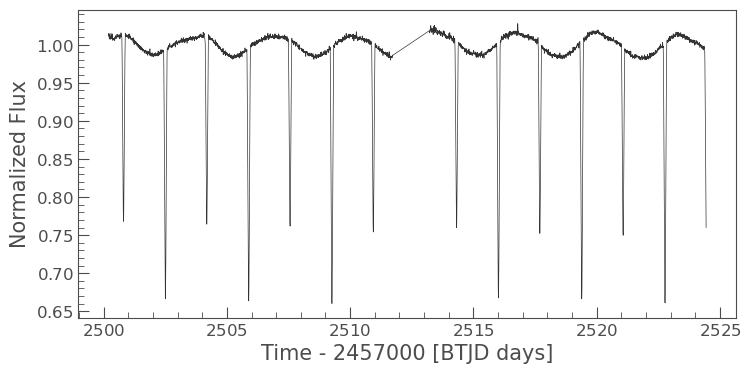

In [20]:
corrected_lc = corrected_lc.normalize()
corrected_lc.plot()
plt.show()

In [21]:
plt.figure(figsize=(10,4))

plt.plot(corrected_lc.time.value, corrected_lc.flux.value)
#plt.errorbar(data['time'], data['kspsap_flux'], yerr = data['kspsap_flux_err'], linestyle='none')
plt.scatter(lc.time.value, lc.flux.value, c='r')

plt.xlim(2500, 2525)
#plt.yticks(np.arange(0.2, 1.1, 0.1)) 
plt.title("Light curve")
plt.xlabel('BJD - 2457000.0 [BTJD]')
plt.ylabel('Norm Flux')
#plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'lc' is not defined

In [22]:
for i in range(300, 700):
    print(i, corrected_lc["time"][i], pld.outlier_mask[i])
    print(i, corrected_lc["time"][i], corrected_lc["flux"][i])

300 2502.275985465404 False
300 2502.275985465404 0.9900326132774353
301 2502.2829305897944 False
301 2502.2829305897944 0.9888821840286255
302 2502.2898757141847 False
302 2502.2898757141847 0.9901991486549377
303 2502.2968208384596 False
303 2502.2968208384596 0.9882955551147461
304 2502.3037659627344 False
304 2502.3037659627344 0.989733874797821
305 2502.3107110868923 False
305 2502.3107110868923 0.9895572066307068
306 2502.3176562110516 False
306 2502.3176562110516 0.9926119446754456
307 2502.324601335094 False
307 2502.324601335094 0.9876286387443542
308 2502.3315464590178 False
308 2502.3315464590178 0.9934629201889038
309 2502.338491582943 False
309 2502.338491582943 0.9886264204978943
310 2502.345436706753 False
310 2502.345436706753 0.9900756478309631
311 2502.352381830561 False
311 2502.352381830561 0.9901826977729797
312 2502.359326954254 False
312 2502.359326954254 0.9888494610786438
313 2502.3662720778293 False
313 2502.3662720778293 0.9923005104064941
314 2502.3732172014

In [23]:
mask = np.ones(len(corrected_lc.time), dtype=bool)
mask[2170] = False
mask[2171] = False
corrected_lc_clean1 = corrected_lc[mask]

eclipse_mask1_s44 = corrected_lc_clean1.create_transit_mask(transit_time=corrected_lc["time"][89], period=(3.375240), duration=0.2)
corrected_lc_clean2 = corrected_lc_clean1[~eclipse_mask1_s44]

eclipse_mask2_s44 = corrected_lc_clean2.create_transit_mask(transit_time=corrected_lc["time"][333], period=(3.375240), duration=0.2)
corrected_lc_clean = corrected_lc_clean2[~eclipse_mask2_s44]

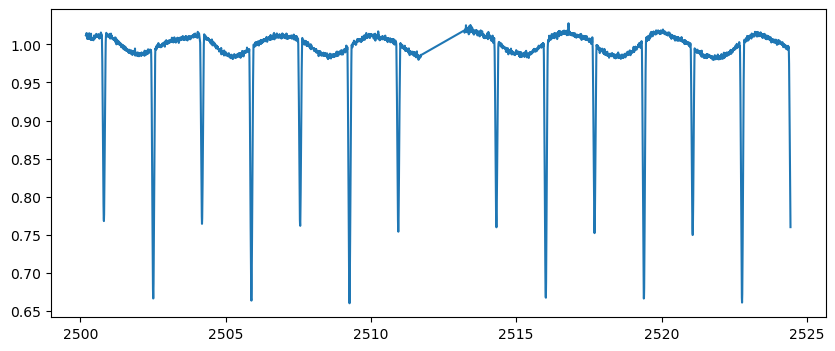

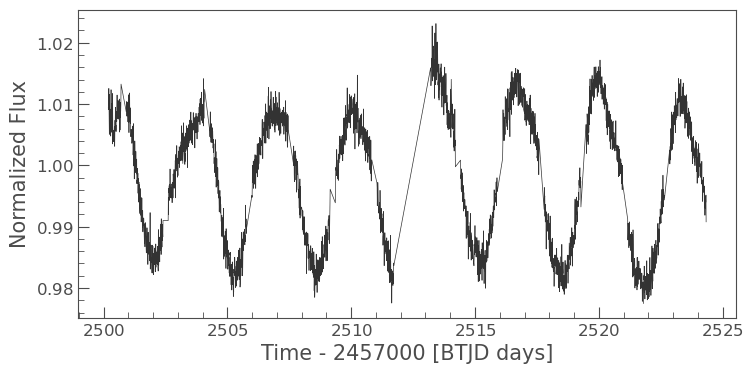

In [24]:
lc_s44_new = corrected_lc_clean.normalize()
lc_s44_new.plot()
plt.show()

/home/polina/miniforge3/envs/ciao-4.17/lib/python3.11/site-packages/astropy/units/quantity.py:659: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


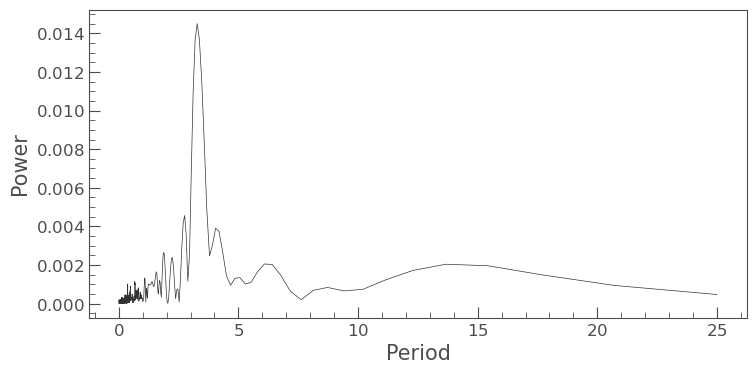

<Quantity 3.27751663 d>

In [25]:
lc_s44_pg= lc_s44_new.to_periodogram(method='ls', maximum_period=25)
lc_s44_pg.plot()
plt.xlabel("Period")
plt.ylabel("Power")
plt.show()
lc_s44_pg.period_at_max_power

In [27]:
phase = lc_s44_phase.phase.value
flux = lc_s44_phase.flux.value

phase_new = np.concatenate((phase, [x + 1 for x in phase], [x + 2 for x in phase]))
flux_new = np.concatenate((flux, flux, flux))

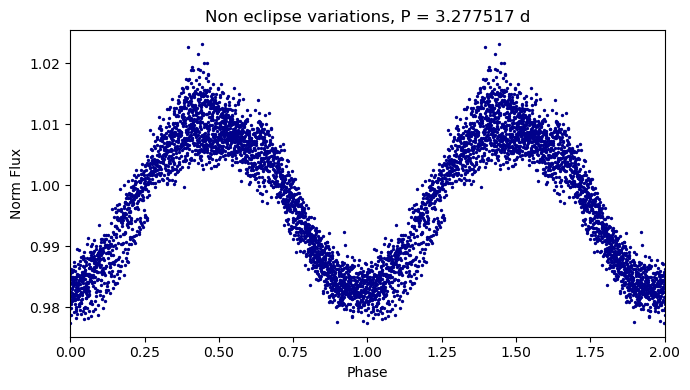

In [28]:
plt.figure(figsize=(7,4))

plt.scatter(phase_new, flux_new, s=2, color = 'darkblue')
#plt.xticks(np.arange(0.2, 1.1, 0.1)) 
plt.xlim(0, 2)
plt.title(f"Non eclipse variations, P = {lc_s44_pg.period_at_max_power:.6f}")
plt.xlabel('Phase')
plt.ylabel('Norm Flux')
plt.tight_layout()
#plt.text(1.65, 0.65, f"Period = {lc_new_pg.period_at_max_power*2:.6f}")
plt.show()

In [38]:
p= lc_s44_pg.period_at_max_power
lc1 = lc_s44_new.truncate(before=lc_s44_new["time"][240].value, after=(lc_s44_new["time"][240] + p).value)
lc2 = lc_s44_new.truncate(before=(lc_s44_new["time"][240] + p).value, after=(lc_s44_new["time"][240] + 2*p).value)
lc3 = lc_s44_new.truncate(before=(lc_s44_new["time"][240] + 2*p).value, after=(lc_s44_new["time"][240] + 3*p).value)
lc4 = lc_s44_new.truncate(before=(lc_s44_new["time"][240] + 3*p).value, after=(lc_s44_new["time"][240] + 4*p).value)
lc5 = lc_s44_new.truncate(before=(lc_s44_new["time"][240] + 4*p).value, after=(lc_s44_new["time"][240] + 5*p).value)
lc6 = lc_s44_new.truncate(before=(lc_s44_new["time"][240] + 5*p).value, after=(lc_s44_new["time"][240] + 6*p).value)
lc7 = lc_s44_new.truncate(before=(lc_s44_new["time"][240] + 6*p).value, after=(lc_s44_new["time"][240] + 7*p).value)

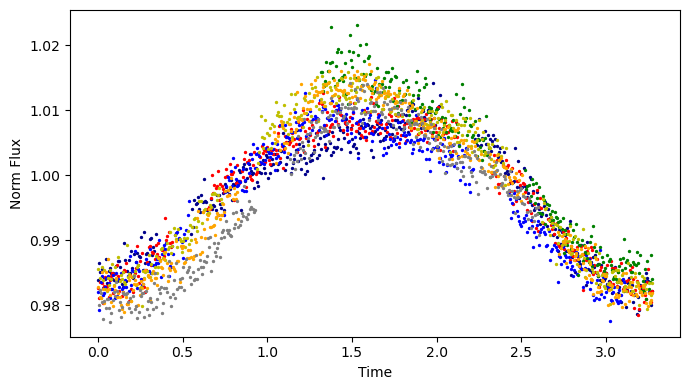

In [39]:
plt.figure(figsize=(7,4))

plt.scatter(lc1["time"].value - lc_s44_new["time"][240].value, lc1["flux"].value, s=2, color = 'darkblue')
plt.scatter(lc2["time"].value - (lc_s44_new["time"][240] + p).value, lc2["flux"].value, s=2, color = 'r')
plt.scatter(lc3["time"].value - (lc_s44_new["time"][240] + 2*p).value, lc3["flux"].value, s=2, color = 'b')
plt.scatter(lc4["time"].value - (lc_s44_new["time"][240] + 3*p).value, lc4["flux"].value, s=2, color = 'g')
plt.scatter(lc5["time"].value - (lc_s44_new["time"][240] + 4*p).value, lc5["flux"].value, s=2, color = 'y')
plt.scatter(lc6["time"].value - (lc_s44_new["time"][240] + 5*p).value, lc6["flux"].value, s=2, color = 'orange')
plt.scatter(lc7["time"].value - (lc_s44_new["time"][240] + 6*p).value, lc7["flux"].value, s=2, color = 'grey')
#plt.xticks(np.arange(0.2, 1.1, 0.1)) 
plt.xlabel('Time')
plt.ylabel('Norm Flux')
plt.tight_layout()

#plt.text(1.65, 0.65, f"Period = {lc_new_pg.period_at_max_power*2:.6f}")
plt.show()

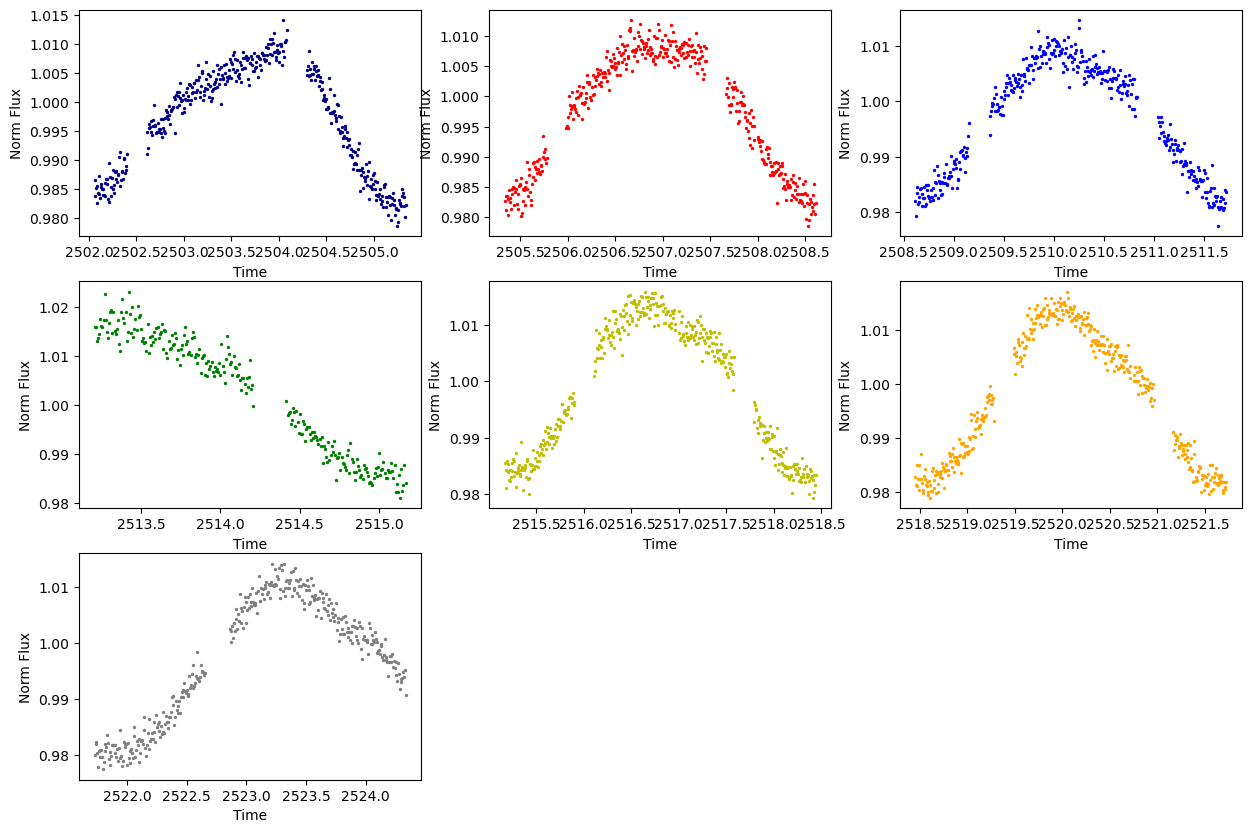

In [40]:
plt.figure(figsize=(15,10))
plt.subplot(3, 3, 1)
plt.scatter(lc1["time"].value, lc1["flux"].value, s=2, color = 'darkblue')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.subplot(3, 3, 2)
plt.scatter(lc2["time"].value, lc2["flux"].value, s=2, color = 'r')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.subplot(3, 3, 3)
plt.scatter(lc3["time"].value, lc3["flux"].value, s=2, color = 'b')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.subplot(3, 3, 4)
plt.scatter(lc4["time"].value, lc4["flux"].value, s=2, color = 'g')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.subplot(3, 3, 5)
plt.scatter(lc5["time"].value, lc5["flux"].value, s=2, color = 'y')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.subplot(3, 3, 6)
plt.scatter(lc6["time"].value, lc6["flux"].value, s=2, color = 'orange')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.subplot(3, 3, 7)
plt.scatter(lc7["time"].value, lc7["flux"].value, s=2, color = 'grey')
plt.xlabel('Time')
plt.ylabel('Norm Flux')

plt.show()

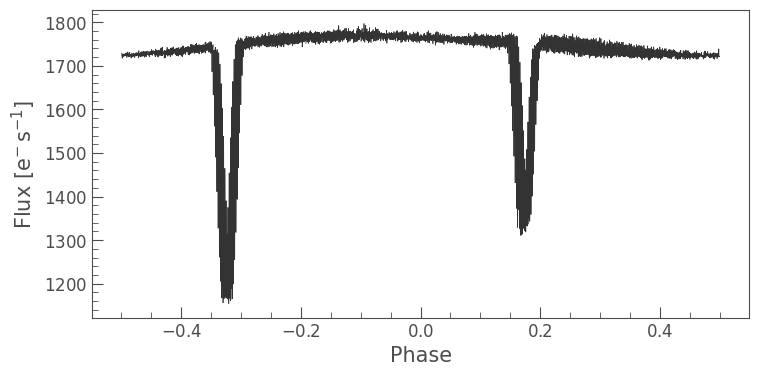

In [33]:
lc_phase=corrected_lc.fold(period=lc_pg.period_at_max_power * 4, normalize_phase = True)
lc_phase.plot()
plt.show()

In [117]:
tpf_s44.interact_sky()

/home/polina/miniconda3/envs/ciao-4.17/lib/python3.11/site-packages/lightkurve/interact.py:559: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
/home/polina/miniconda3/envs/ciao-4.17/lib/python3.11/site-packages/lightkurve/interact.py:644: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
